<a href="https://colab.research.google.com/github/MuhammadAinurRiziq13/PCVK_2024_19/blob/main/Week6_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*   **Nama  : Muhammad Ainur Riziq**
*   **Absen : 19**
*   **Kelas : TI - 3E**

https://github.com/MuhammadAinurRiziq13/PCVK_2024_19

In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


Import beberapa library berikut yang akan digunakan

In [2]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

In [3]:
imgLena = cv.imread('/content/gdrive/MyDrive/pcvk/lena.jpg')

3. Buatlah histogram citra seperti output histogram berikut berdasarkan flowchart di
bawah ini : (Gunakan gambar lena.jpg)


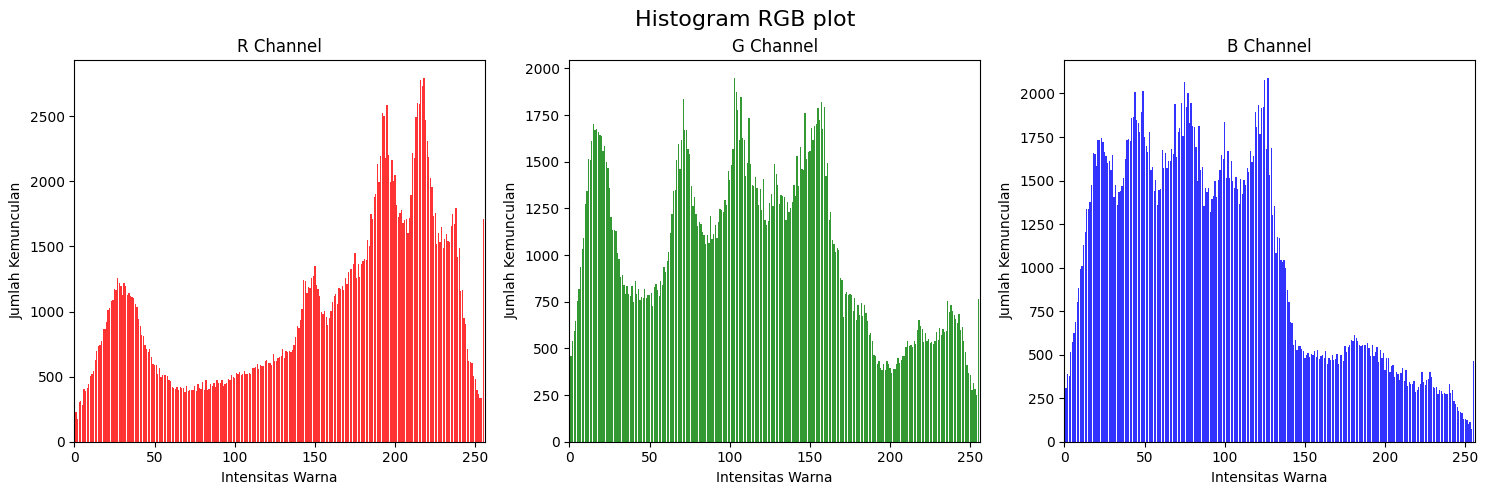

In [ ]:
img = imgLena.copy()
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot', fontsize=16)

for i, color in enumerate(colors):
    plt.subplot(1, 3, i+1)
    histogram = cv.calcHist([img], [i], None, [256], [0, 256])
    plt.bar(range(256), histogram.ravel(), color=color, alpha=0.8)
    plt.title(f'{color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

4. Setelah mengerjakan soal no. 3, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh NumPy yaitu “histogram”. Bandingkan
hasilnya. Apakah output muncul sama?


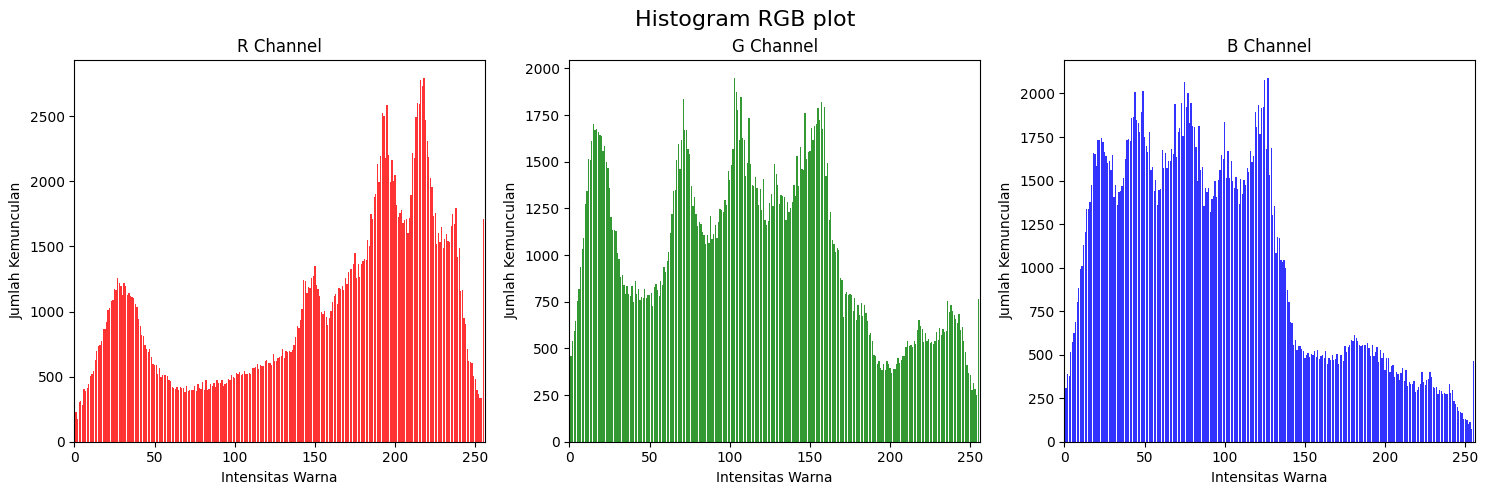

In [ ]:
img2 = imgLena.copy()
img2 = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Mendefinisikan warna saluran
colors = ('r', 'g', 'b')
plt.figure(figsize=(15, 5))
plt.suptitle('Histogram RGB plot', fontsize=16)

# Menghitung histogram untuk setiap saluran warna
for i, color in enumerate(colors):
    plt.subplot(1, 3, i + 1)
    # Menggunakan saluran yang sesuai dengan urutan R, G, B
    histogram, bin_edges = np.histogram(img[:, :, i], bins=256, range=(0, 256))
    plt.bar(bin_edges[:-1], histogram, color=color, alpha=0.8)
    plt.title(f'{color.upper()} Channel')
    plt.xlim([0, 256])
    plt.xlabel('Intensitas Warna')
    plt.ylabel('Jumlah Kemunculan')

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.show()

5. Buatlah histogram citra seperti output histogram equalization dan juga tampilan
gambar sebelum dan sesudah proses histogram equalization berikut berdasarkan
flowchart di bawah ini : (Gunakan gambar lena_lc.jpg)

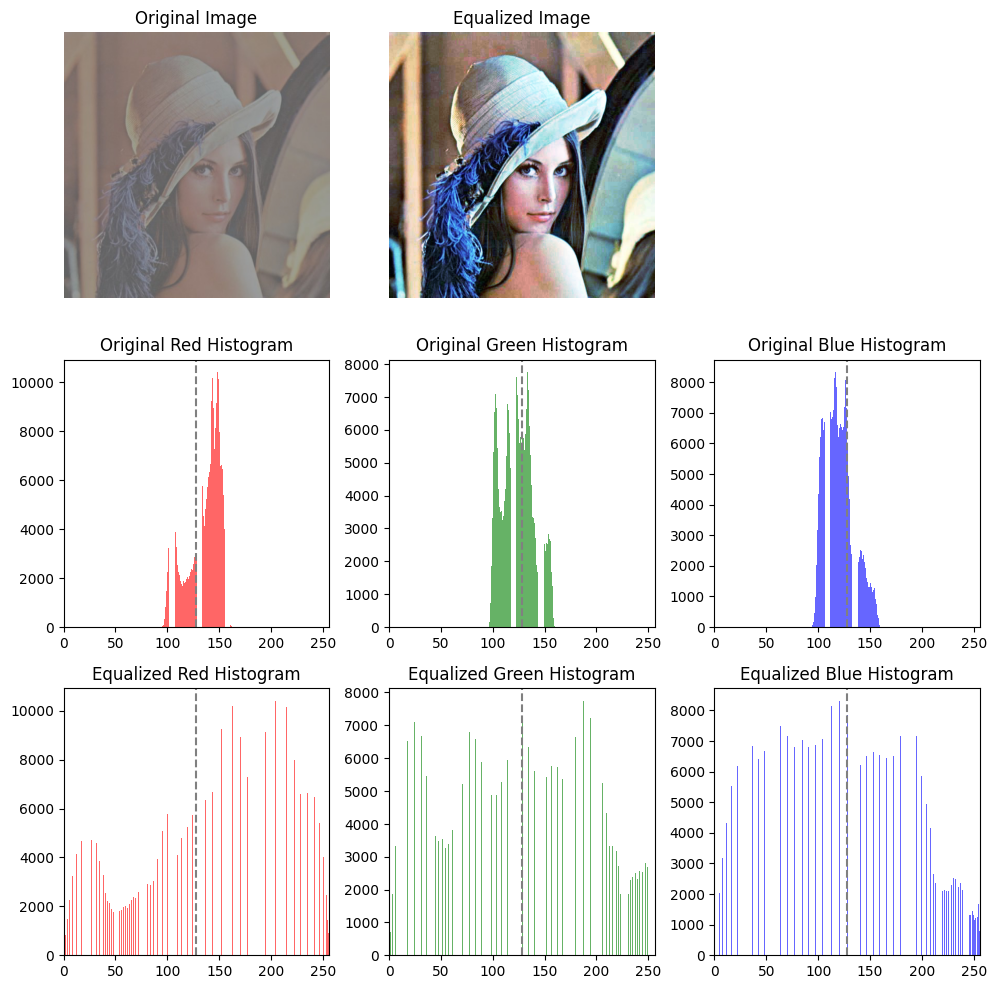

In [ ]:
image_url = '/content/gdrive/MyDrive/pcvk/lena_lc.jpg'
original_image = io.imread(image_url)

# Convert the image from RGB to BGR (OpenCV uses BGR format)
original_image_bgr = cv.cvtColor(original_image, cv.COLOR_RGB2BGR)

# Step 2: Apply Histogram Equalization for each channel separately
def equalize_rgb_image(image):
    # Split the image into its respective channels
    r, g, b = cv.split(image)

    # Apply Histogram Equalization to each channel
    eq_r = cv.equalizeHist(r)
    eq_g = cv.equalizeHist(g)
    eq_b = cv.equalizeHist(b)

    # Merge the equalized channels back
    equalized_image = cv.merge((eq_r, eq_g, eq_b))
    return equalized_image

# Equalize the image
equalized_image = equalize_rgb_image(original_image_bgr)

# Step 3: Plot the results with modified histograms (Red, Green, Blue order)
def plot_images_and_histograms(original, equalized):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    # Row 1: Display the original and equalized images
    axs[0, 0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(cv.cvtColor(equalized, cv.COLOR_BGR2RGB))
    axs[0, 1].set_title("Equalized Image")
    axs[0, 1].axis('off')

    # Remove the empty subplot in the first row
    fig.delaxes(axs[0, 2])

    # Define colors for the histogram plots
    colors = ('r', 'g', 'b')
    channel_names = ('Red', 'Green', 'Blue')

    # Urutan kanal berubah menjadi Red, Green, Blue
    channels_original = [cv.split(original)[2], cv.split(original)[1], cv.split(original)[0]]
    channels_equalized = [cv.split(equalized)[2], cv.split(equalized)[1], cv.split(equalized)[0]]

    # Row 2: Plot histograms for each color channel (Original)
    for i, (channel, color, name) in enumerate(zip(channels_original, colors, channel_names)):
        axs[1, i].hist(channel.ravel(), 256, [0, 256], color=color, alpha=0.6, rwidth=0.8)
        axs[1, i].axvline(128, color='gray', linestyle='dashed', linewidth=1.5)
        axs[1, i].set_title(f'Original {name} Histogram')
        axs[1, i].set_xlim([0, 256])

    # Row 3: Plot histograms for each color channel (Equalized)
    for i, (channel, color, name) in enumerate(zip(channels_equalized, colors, channel_names)):
        axs[2, i].hist(channel.ravel(), 256, [0, 256], color=color, alpha=0.6, rwidth=0.8)
        axs[2, i].axvline(128, color='gray', linestyle='dashed', linewidth=1.5)
        axs[2, i].set_title(f'Equalized {name} Histogram')
        axs[2, i].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Step 4: Show the results
plot_images_and_histograms(original_image_bgr, equalized_image)

6. Setelah mengerjakan soal no. 5, buatlah histogram citra yang sama akan tetapi
menggunakan library yang dimiliki oleh CV2 yaitu “equalizeHist”. Bandingkan
hasilnya. Apakah output muncul sama?

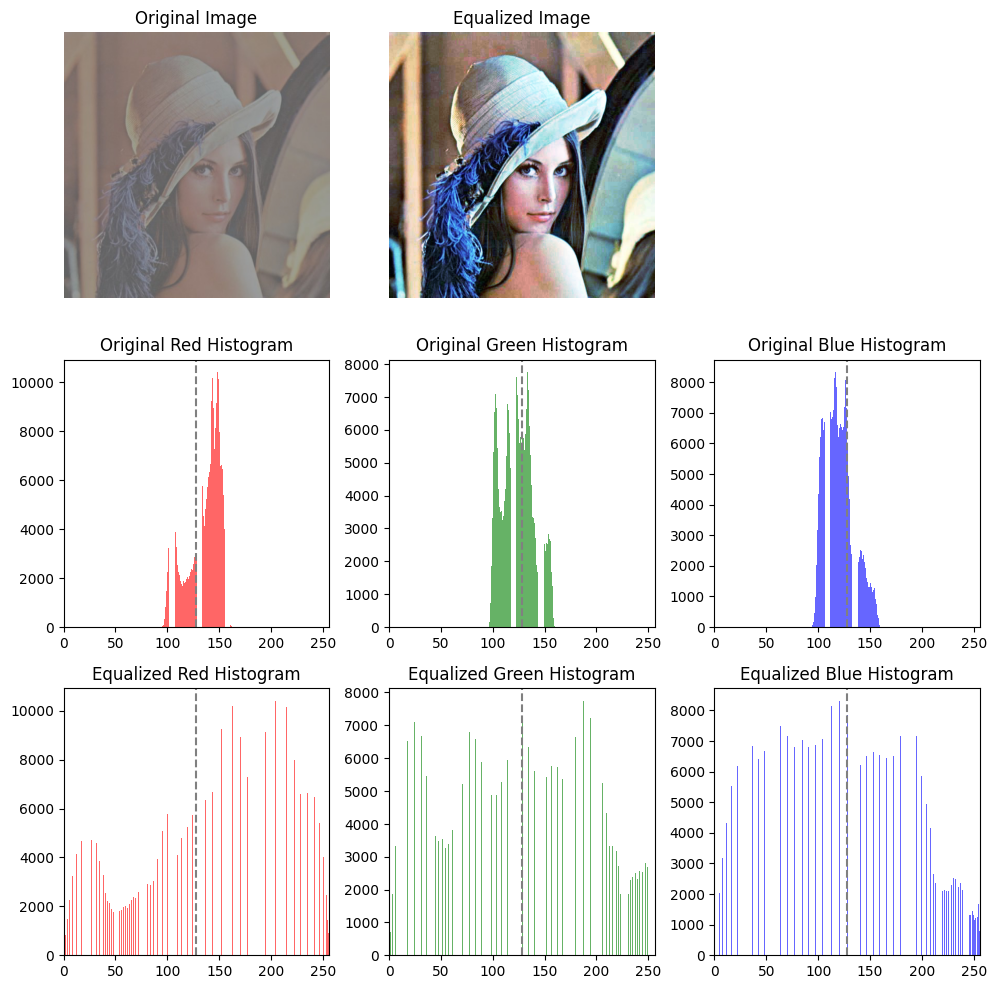

In [ ]:
# Step 1: Input image
original_image_bgr = cv.imread('/content/gdrive/MyDrive/pcvk/lena_lc.jpg')

# Step 2: Apply Histogram Equalization for each channel separately using cv.equalizeHist
def equalize_rgb_image(image):
    # Split the image into its respective channels
    b, g, r = cv.split(image)

    # Apply Histogram Equalization to each channel using OpenCV
    eq_b = cv.equalizeHist(b)
    eq_g = cv.equalizeHist(g)
    eq_r = cv.equalizeHist(r)

    # Merge the equalized channels back
    equalized_image = cv.merge((eq_b, eq_g, eq_r))
    return equalized_image

# Equalize the image
equalized_image = equalize_rgb_image(original_image_bgr)

# Step 3: Plot the results with modified histograms (Red, Green, Blue order)
def plot_images_and_histograms(original, equalized):
    fig, axs = plt.subplots(3, 3, figsize=(10, 10))

    # Row 1: Display the original and equalized images
    axs[0, 0].imshow(cv.cvtColor(original, cv.COLOR_BGR2RGB))
    axs[0, 0].set_title("Original Image")
    axs[0, 0].axis('off')

    axs[0, 1].imshow(cv.cvtColor(equalized, cv.COLOR_BGR2RGB))
    axs[0, 1].set_title("Equalized Image")
    axs[0, 1].axis('off')

    # Remove the empty subplot in the first row
    fig.delaxes(axs[0, 2])

    # Define colors for the histogram plots
    colors = ('r', 'g', 'b')
    channel_names = ('Red', 'Green', 'Blue')

    # Urutan kanal berubah menjadi Red, Green, Blue
    channels_original = [cv.split(original)[2], cv.split(original)[1], cv.split(original)[0]]
    channels_equalized = [cv.split(equalized)[2], cv.split(equalized)[1], cv.split(equalized)[0]]

    # Row 2: Plot histograms for each color channel (Original)
    for i, (channel, color, name) in enumerate(zip(channels_original, colors, channel_names)):
        axs[1, i].hist(channel.ravel(), 256, [0, 256], color=color, alpha=0.6, rwidth=0.8)
        axs[1, i].axvline(128, color='gray', linestyle='dashed', linewidth=1.5)
        axs[1, i].set_title(f'Original {name} Histogram')
        axs[1, i].set_xlim([0, 256])

    # Row 3: Plot histograms for each color channel (Equalized)
    for i, (channel, color, name) in enumerate(zip(channels_equalized, colors, channel_names)):
        axs[2, i].hist(channel.ravel(), 256, [0, 256], color=color, alpha=0.6, rwidth=0.8)
        axs[2, i].axvline(128, color='gray', linestyle='dashed', linewidth=1.5)
        axs[2, i].set_title(f'Equalized {name} Histogram')
        axs[2, i].set_xlim([0, 256])

    plt.tight_layout()
    plt.show()

# Step 4: Show the results
plot_images_and_histograms(original_image_bgr, equalized_image)

7.  Lakukanlah proses pemetaan 16 juta warna RGB ke dalam 8 warna saja, yaitu hitam,
hijau, kuning, biru, cyan, magenta, putih seperti output berikut berdasarkan flowchart
di bawah ini! (Gunakan gambar lena.jpg)


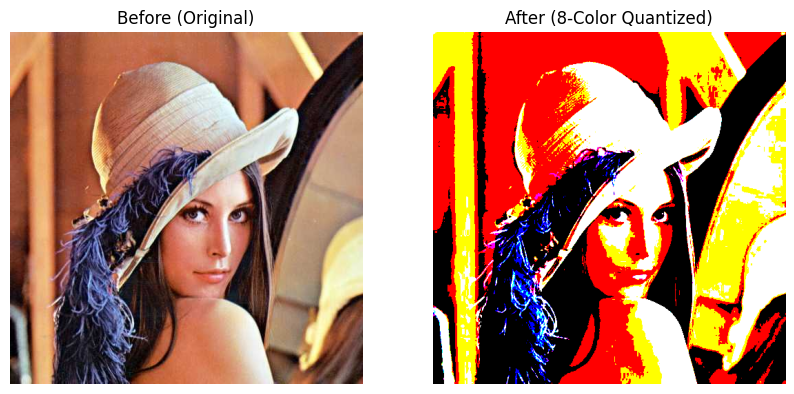

In [5]:
img = cv.imread('/content/gdrive/MyDrive/pcvk/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Define 8 basic colors (RGB)
color_palette = {
    'black': np.array([0, 0, 0]),
    'white': np.array([255, 255, 255]),
    'red': np.array([255, 0, 0]),
    'green': np.array([0, 255, 0]),
    'blue': np.array([0, 0, 255]),
    'cyan': np.array([0, 255, 255]),
    'magenta': np.array([255, 0, 255]),
    'yellow': np.array([255, 255, 0])
}

# Function to calculate the distance between 2 RGB values
def calculate_distance(color1, color2):
    return np.sqrt(np.sum((color1 - color2) ** 2))

# Function to map a pixel color to the nearest color in the palette
def map_color_to_palette(pixel, palette):
    min_distance = float('inf')
    nearest_color = None

    # Compare the distance of the pixel to each color
    for color_name, color_value in palette.items():
        distance = calculate_distance(pixel, color_value)
        if distance < min_distance:
            min_distance = distance
            nearest_color = color_value

    return nearest_color

# Create a copy for output
mapped_img = np.zeros_like(img)

# Loop through each pixel to map it to the nearest color
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        mapped_img[i, j] = map_color_to_palette(img[i, j], color_palette)

# Display the results
plt.figure(figsize=(10, 5))  # Create a layout

plt.subplot(1, 2, 1)
plt.imshow(img)
plt.axis('off')
plt.title('Before (Original)')

plt.subplot(1, 2, 2)
plt.imshow(mapped_img)
plt.axis('off')
plt.title('After (8-Color Quantized)')

plt.show()

8. Lakukanlah proses dithering Floyd and Steinberg seperti output berikut (tampilan image
awal, dan tampilan setelah dithering) berdasarkan flowchart di bagian bawah halaman
modul ini! (Gunakan gambar lena.jpg)

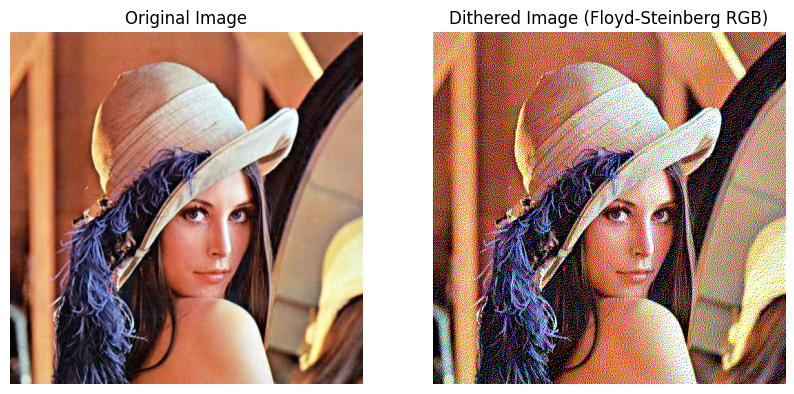

In [9]:
# Load the image in RGB format
img = cv.imread('/content/gdrive/MyDrive/pcvk/lena.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Normalize the image to range 0-1 for dithering
img = img / 255.0

# Dithering Floyd-Steinberg Algorithm for RGB
def floyd_steinberg_dithering_rgb(image):
    h, w, c = image.shape
    output = image.copy()

    for y in range(h):
        for x in range(w):
            for channel in range(c):
                old_pixel = output[y, x, channel]
                new_pixel = np.round(old_pixel)
                output[y, x, channel] = new_pixel
                quant_error = old_pixel - new_pixel

                if x + 1 < w:
                    output[y, x + 1, channel] += quant_error * 7 / 16
                if x - 1 >= 0 and y + 1 < h:
                    output[y + 1, x - 1, channel] += quant_error * 3 / 16
                if y + 1 < h:
                    output[y + 1, x, channel] += quant_error * 5 / 16
                if x + 1 < w and y + 1 < h:
                    output[y + 1, x + 1, channel] += quant_error * 1 / 16

    # Clip values to the range 0-1
    output = np.clip(output, 0, 1)
    return output

# Apply Floyd-Steinberg dithering
dithered_img_rgb = floyd_steinberg_dithering_rgb(img)

# Convert images back to 0-255 range for display
original_img_display = (img * 255).astype(np.uint8)
dithered_img_display = (dithered_img_rgb * 255).astype(np.uint8)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_img_display)
plt.axis('off')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(dithered_img_display)
plt.axis('off')
plt.title('Dithered Image (Floyd-Steinberg RGB)')

plt.show()

9. Menggunakan lena_lc.jpg rubah menjadi grey image, kemudian terapkan histogram
equalization sehingga terjadi perbaikan sebaran warna pada citra. Setelah itu dari hasil
histogram equalization implementasikan proses dithering Floyd and Steinberg sehingga
menampilkan gambar di bawah ini!

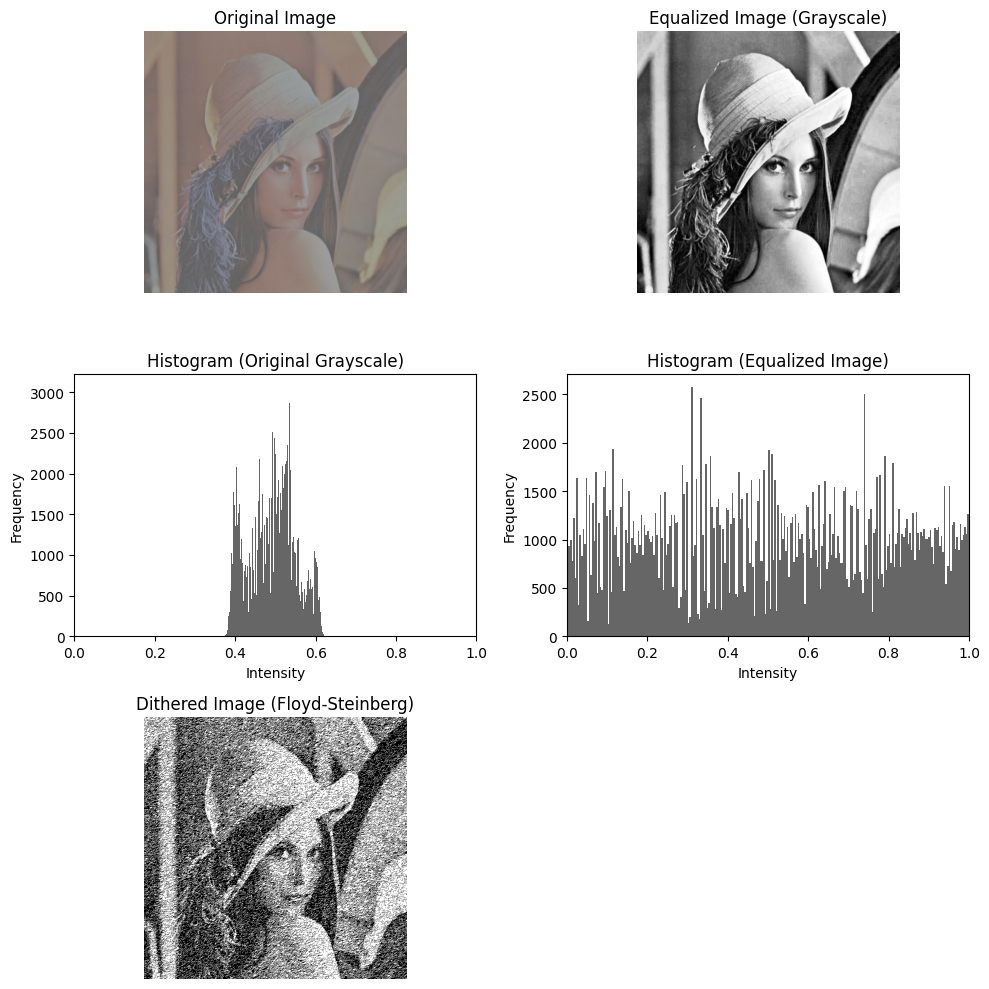

In [24]:
from skimage import color, exposure
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the original image and convert to RGB
img = cv.imread('/content/gdrive/MyDrive/pcvk/lena_lc.jpg')
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Convert the image to grayscale using skimage
gray_img = color.rgb2gray(img_rgb)

# Apply Histogram Equalization using skimage
equalized_img = exposure.equalize_hist(gray_img)

# Implement Floyd-Steinberg dithering algorithm
def floyd_steinberg_dithering(image, error_weights=(7/16, 3/16, 5/16, 1/16)):
    img = image.copy() * 255  # Scale image to 0-255 range
    img = img.astype(np.float32)  # Convert to float for better accuracy
    height, width = img.shape

    for y in range(height):
        for x in range(width):
            original_pixel = img[y, x]
            new_pixel = np.round(original_pixel / 255) * 255  # Map to 0 or 255
            img[y, x] = new_pixel
            error = original_pixel - new_pixel

            # Distribute the quantization error to neighboring pixels
            if x + 1 < width:
                img[y, x + 1] += error * error_weights[0]  # Right
            if y + 1 < height:
                if x > 0:
                    img[y + 1, x - 1] += error * error_weights[1]  # Bottom-left
                img[y + 1, x] += error * error_weights[2]  # Bottom
                if x + 1 < width:
                    img[y + 1, x + 1] += error * error_weights[3]  # Bottom-right

    return np.clip(img, 0, 255).astype(np.uint8)  # Ensure values are valid pixel range

# Apply Floyd-Steinberg dithering with custom weights
dithered_img = floyd_steinberg_dithering(equalized_img, error_weights=(1.0, 0.8, 0.7, 0.5))

# Display results
plt.figure(figsize=(10, 10))  # Adjust the layout for better viewing

# Original Image in Grayscale
plt.subplot(3, 2, 1)
plt.imshow(img_rgb)  # Grayscale image
plt.title('Original Image')
plt.axis('off')

# Equalized Grayscale Image
plt.subplot(3, 2, 2)
plt.imshow(equalized_img, cmap='gray')
plt.title('Equalized Image (Grayscale)')
plt.axis('off')

# Histogram of Original Grayscale Image
plt.subplot(3, 2, 3)
plt.hist(gray_img.ravel(), bins=256, color='black', alpha=0.6)
plt.title('Histogram (Original Grayscale)')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 1)

# Histogram of Equalized Grayscale Image
plt.subplot(3, 2, 4)
plt.hist(equalized_img.ravel(), bins=256, color='black', alpha=0.6)
plt.title('Histogram (Equalized Image)')
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.xlim(0, 1)

# Dithered Image
plt.subplot(3, 2, 5)
plt.imshow(dithered_img, cmap='gray')
plt.title('Dithered Image (Floyd-Steinberg)')
plt.axis('off')

plt.tight_layout()
plt.show()